# Problem Statement

Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df= pd.read_csv('Downloads/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.shape

(101, 18)

In [8]:
df= df.drop(columns='animal name')
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Model Building

In [9]:
x= df.iloc[:,0:16]
y= df['type']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [12]:
xtrain.shape

(75, 16)

In [16]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print(model.score(xtrain, ytrain))
    print(model.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [14]:
predict(KNeighborsClassifier(n_neighbors=5))

0.9066666666666666
0.7692307692307693
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       1.00      1.00      1.00         5
           4       0.60      1.00      0.75         3
           5       0.00      0.00      0.00         0
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         4

    accuracy                           0.77        26
   macro avg       0.52      0.64      0.55        26
weighted avg       0.76      0.77      0.75        26



In [15]:
trainac=[]
testac=[]

for i in range(1,30):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred= knn.predict(xtest)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [18]:
data= pd.DataFrame({'Train Accuracy' :trainac,
     'Test Accuracy': testac})
data

,Train Accuracy,Test Accuracy
0,1.000000,0.961538
1,0.973333,0.846154
2,0.960000,0.769231
3,0.960000,0.769231
4,0.906667,0.769231
5,0.906667,0.769231
6,0.893333,0.769231
7,0.893333,0.769231
8,0.853333,0.769231
9,0.786667,0.769231


In [19]:
data['diff']= data['Train Accuracy']-data['Test Accuracy']
data[data['diff'] == min(data['diff'])]

,Train Accuracy,Test Accuracy,diff
18,0.733333,0.769231,-0.035897


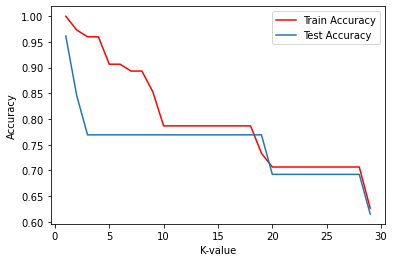

In [20]:
plt.plot(range(1,30),trainac,color='red', label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.legend()

In [21]:
predict(KNeighborsClassifier(n_neighbors=2))

0.9733333333333334
0.8461538461538461
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       0.40      1.00      0.57         2
           7       0.00      0.00      0.00         4

    accuracy                           0.85        26
   macro avg       0.57      0.67      0.60        26
weighted avg       0.80      0.85      0.81        26

